### BLOG SENTIMENT ANALYSIS 

This is the seccond part of my capstone, I'll try to evaluate one of the top ten blogs relate to the oil market.

1. I'll take the last 10 post from May (as a sample) 
2. Then i'll take the current last 10 post (as my experiment)
3. Build a sentiment analysis for both and try to analyses if they actually can predict the movement of the wti index oil price. 

Extra observation: 
1. I found a text database with the "Positive" and "Negative" words use it to review the stock market 
###### Please found it in my Database 

##### Warning: The evaluation bellow is a test of what I'll execute next.

Blogs Web Page: http://blogs.platts.com/category/oil/

In [2]:
from gensim import corpora, models, matutils
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import defaultdict
import pandas as pd
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
from gensim import corpora, models, matutils
from collections import defaultdict
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
#May 22, 2017, Robert Perkins, Senior writer/editor

blog1 =('Fuel for Thought: Oil outlook – crunch time or gloom mongering?'
'That the global oil market is set to tighten over the coming years is not in doubt, but whether it’s time to' 
'hit the panic button over a future supply crunch is another issue.'
'Industry warnings over the risk of an oil supply “crunch” and a potential return to high-cost oil in the coming' 
'decade due to the massive cuts in upstream spending since 2014 have been circulating for some time.'
'The consensus is that rebounding US shale supplies will keep a lid on oil prices at least in the short term,' 
'but there is much less unanimity on whether the oil market will enjoy a soft or painful landing some five years' 
'from now. The International Energy Agency in October said sliding levels of investment in conventional oil fields'
'was putting future flows from the sector on a knife’s edge, threatening to create a supply gap of some 16 million'
'b/d by 2025. OPEC and a number of leading oil market watchers have also sounded caution over an impending return to'
'an oil price bull cycle unless new oil projects are sanctioned quickly and the investment dollars begin to flow.'
'The underlying logic, they believe, is straightforward. After peaking at almost $700 billion in 2014, global' 
'upstream spending collapsed to $433 billion in 2016 following two back-to-back declines of about 25% a year,' 
'according to the IEA. As a result, more than 6 million b/d of projects have been postponed or canceled across' 
'non-OPEC and OPEC countries. At the same time, oil demand growth is set to climb by at least 1 million b/d each year'
'while field decline rates are accelerating, raising the requirement to fill an ever bigger hole in future' 
'flows from existing fields.'
'Global dependence on US shale output will grow but, the reasoning goes, even under the most optimistic scenarios,' 
'shale will simply be unable to plug'
'the impending supply shortage and OPEC’s own spare capacity will wear ominously thin.'
'By the IEA’s reckoning, demand for OPEC crude is expected to jump to 35.8 million b/d by in 2022, up from 32.2' 
'million b/d last year.'
'The sharp increase means OPEC spare capacity will contract to less than 2% of global demand in 2022, a 14-year' 
'low and almost half the levels in 2008'
'when oil prices hit record highs.'
'MORE OIL SUPPLY READY TO BE TAPPED'
'But not everyone follows this line of thinking and many point to a more nuanced picture for global oil supply in' 
'spite of the acute spending slump since 2014.'
'For starters, upstream spending may be on a path to recovery. Final investment decisions on big upstream projects' 
'began to return at the end of 2016 and FIDs are expected to double globally this year.'
'The spending that does return will also stretch further than it did in the years preceding the 2014 price collapse.' 
'Soaring industry costs meant, up to then, many oil majors were effectively running to stand still in terms'
'of production growth. In many cases, producers were even failing to achieve that.'
'With upstream industry costs shrinking at least 30% since the downturn, the impact of the falling capital expenditure' 
'is largely mitigated by falling'
'breakevens, many believe.'
'The potential for further cost cutting and efficiency gains in a $50-$60/b oil price world capped by US shale, has'
'made Citigroup, for one, less pessimistic over a future supply gap, allowing more projects currently on ice to' 
'come to market.'
'Citi argues that the growth potential of deepwater and oil sands, in addition to further technological improvements' 
'and cost deflation, could also “neutralize” any supply tightness in the medium term.'
'Branding the US shale oil revolution “unstoppable” with oil prices above $40/b, Citi believes the US shale recovery' 
'will be more robust than most forecasts, potentially adding 3 million to 5 million b/d of new “short-cycle”'
'supply to the market by 2022.'
'Outside the US, the availability of low-cost oil in Iran, Iraq and Venezuela, and the potential for supply surges' 
'from Russia and the return of disrupted oil in Libya and Nigeria will all play a part in offsetting delayed' 
'start-ups elsewhere, according to Citi.'
'One particular bone of contention is the expectation for accelerating field decline and depletion rates in response'
'to the lack of activity on existing conventional fields. After all, excluding US shale and OPEC producers,' 
'global rigs counts have almost halved since 2015. There may be further good news for market balances on the' 
'demand side. Oil demand growth is being tempered globally by efficiency gains which are cutting energy intensity' 
'and driving a further decoupling of economic growth and energy consumption. Continued moves towards natural gas as the' 
'lower-carbon fuel of choice for the coming decades are also seen as weakening the world’s dependence on liquid' 
'hydrocarbons.For now at least, it seems the alarm-inducing headlines over the fallout from the recent upstream' 
'investment dearth have won the day. It remains to be seen whether producers will rebound from the shock of' 
'low prices to prove the naysayers wrong.')

In [4]:
#May 16, 2017, Neil Ford, Freelance consultant and journalist

blog2= ('Cautious progress in Libya’s oil output'
'Rising Libyan oil production is primarily the result  of the military success of General Khalifa Haftar, whose' 
'so-called Libyan National Army forces are wresting unitary control of the oil supply chain from a patchwork of local' 
'militias.These advances have forced the UN-backed Government of National Accord to the negotiating table, raising'
'the prospect of a political settlement that would reinforce the gradual and fragile movement towards normalization' 
'in the country.'
'Libyan oil production rose above 800,000 b/d in May for the first time in three years.'
'The trend is gradually upward, but in fits and starts; April production averaged 550,000 b/d, 70,000 b/d lower than' 
'in March, according to an S&P Global Platts survey.'
'While rising Libyan oil production is problematic for OPEC as it seeks to reduce output to rebalance the market, on' 
'a national level it raises hopes that Libya is slowly recovering from years of war and infighting.'
'The National Oil Corporation (NOC) believes that production of 1.2 million b/d is possible by August, although this' 
'would still be some way short of the 1.6 million b/d recorded before the 2011 uprising against Muammar Qadhafi.'
'Whether this can be achieved depends on continued improvement in the political situation. There are currently'
'two main centers of power: the House of Representatives in Tobruk in the east, which Haftar is affiliated'
'with, and the Tripoli-based GNA.'
'Both lay claim to be the legitimate government, although only the GNA is recognized by the UN.'
'More importantly, as far as the oil industry is concerned, dozens of localized militias control different parts' 
'of the country. Most sprang up during the rebellion against Qadhafi and some are loosely allied with one or'
'other of the two governments.'
'Separate factions have controlled various parts of the same oil supply chain, with fields, pipelines and export' 
'terminals all held by different groups. It is this partition, even more so than damage to the physical' 
'infrastructure of the industry, that has held back production.'
'Talks in the United Arab Emirates at the start of May suggested that the two governments could come together' 
' GNA leader Fayez al-Sarraj appears to have been forced to the negotiating table as Haftar now controls around' 
'two-thirds of the country.'
'On May 10, it was revealed that the GNA had offered to make Haftar head of an official unified national army if he' 
'agrees to back the Tripoli government.'
'The UN’s position is particularly difficult. Its preferred government is losing the territorial struggle, while' 
'Haftar represents the only elected parliament in the country.'
'Aside from the UAE, the governments of Egypt and Italy are also heavily involved in the peace talks. Egypt wants' 
'a government of national unity formed to focus attention on tackling Islamist militants in Libya.'
'For its part, Rome has economic interests in its former colony, including Eni’s heavy involvement in the oil' 
'industry. Italy also imports natural gas from Libya via the Greenstream pipeline under the Mediterranean.'
'The role of the NOC could be crucial in deciding the political balance of power. NOC has benefited from Haftar’s' 
'forces progressively extending their control over the oil industry.'
'At the same time, NOC chairman Mustafa Sanalla has criticized al-Sarraj in recent weeks.'
'The UN may have backed the wrong horse, but the recent talks suggest that there is at least the possibility of it' 
'not being an either/or situation.')

In [5]:
#May 15, 2017, Bob Williams 

blog3= ('Ample oil supply in a demand-constrained world: Fuel for Thought'
'Anyone looking for clues as to the direction of global oil demand would be well advised to count the number of' 
'electric bicycles dodging traffic in China’s streets.'
'It was once held that if all of the hundreds of millions of Chinese bicycle riders were to buy a car, oil' 
'demand there would jump by—pick a big number—xx%. But rather than abandoning bicycles for cars,' 
'many Chinese just upgraded to electric bicycles.'
'By 2013, the number of electric bikes on the road there had experienced a thousand-fold increase in 15 years;' 
'roughly 200 million are now in use in China, a number expected to reach 250 million by decade’s end. Cost is a' 
'factor, as is Chinese cities’ terrible smog. But the biggest factor seems to be convenience—more easily'
'navigating the gridlock in China’s big cities.'
'A similar shift in driving patterns may be happening in the US, still the world’s largest consumer of oil for' 
'transportation.'
'After stagnating in the wake of the Great Recession, US gasoline consumption rebounded to record levels in 2016.' 
'But on a per-capita basis, there has been a sharp fall-off in the number of vehicle miles traveled (VMT). Currently,' 
'the US Energy Information Administration forecasts that VMT growth overall will drop by -0.2%/year to 2050.'
'The automobile became a disruptive change in American life because it represented the ultimate convenience in mobility.' 
'But it seems that America’s youth just aren’t all that into cars anymore. According to the US Department of '
'Transportation, 30 years ago nearly three-fourths of American teenagers had drivers’ licenses; by 2011, that share' 
'had dropped to half.Then there’s the lure of telecommuting: nearly one-fourth of all employed persons in the US do' 
'some or all of their work at home, according to the latest Bureau of Labor Statistics estimates.'
'The past may not be prologue for oil demand'
'The future increasingly looks to be demand-constrained for oil, even as current and potential future supply of' 
'oil looks more plentiful than ever. And that may not be such a bad thing, if it means fewer, less severe cycles' 
'and stability in planning.'
'But it also would mean that oil and gas drilling decisions increasingly will be made at the economic margin,' 
'with a relentless focus on curbing costs and bolstering operational efficiencies.'
'Recent drilling and completion trends that Platts RigData tracks already point to an outlook of continued' 
'growth in oil supply despite the drop in oil prices since 2014.'
'In 1Q 2017 US land rig counts were up year-over year (+51%), as were well counts (+67%), wells per rig +10%),' 
'and oil IP (initial production) rates (+7% on average). Well costs generally are holding steady.'
'A robust debate over the future of oil demand emerged at the S&P Global Platts North American Crude Oil Summit,' 
'held in Houston last month.'
'Kenneth R. Medlock III, senior director, Center for Energy Studies at Baker Institute, Rice University, contends' 
'that low-ball projections for oil prices based on sluggish demand growth “ignore timeproven fundamentals.”'
'Developed areas worldwide are populated by 1.3 billion people out of the 7 billion people on Earth, he noted,' 
'predicting that 400 million–500 million people will be moving into the middle class globally and will make more' 
'purchases requiring energy inputs such as cars, which will increase'
'demand for crude.But Suzanne Minter, director of strategic industry analytics at Platts Analytics, suggested' 
'instead that, “The emerging middle class around the world is not the same as in the US and may not develop along' 
'the same line that we have and do.”Minter may have been talking about examples such as China’s electric bikes,'
'but her comment could also apply to secular changes in the US.These indicators point to ample supply of oil'
'continuing, but the caveat is that it might come in an increasingly demand-constrained world.')

In [6]:
#May 8, 2017, Mriganka Jaipuriyar, Associate editorial director
blog4 = ('Energy supplies the key to ‘Make in India’ success: Fuel for Thought'
'India’s Narendra Modi-led National Democratic Alliance in late 2014 launched the ‘Make in India’ campaign.' 
'The aim is to replicate the export-led growth of the Asian tigers between 1965 and 1990 and then later China,'
'by raising the manufacturing sector’s share of the GDP to 25% by 2025 from 16% currently.'
'The push to expand manufacturing will trigger a massive demand for oil, gas and other resources. The government' 
'must secure its long-term energy and resource needs as the country is heavily dependent on imported feedstocks and' 
'is vulnerable to external supply shocks and price fluctuations.'
'Energy supply security will be critical to India realizing its ‘Make in India’ dream.'
'The Asian tigers and then China were able to boost manufacturing because their goods were competitive at a time of' 
'rapid expansion in international trade. India is unlikely to be able to emulate this as the external trade environment'
'is no longer as conducive to such a strategy.'
'As a result, India has to look at its domestic market as much as export markets for dynamic growth.'
'As India invites multinationals to set up manufacturing units in the country, the government needs to make sure' 
'policies and incentives are in place that enable them to produce goods competitively. It must ensure that the' 
'planned multi-billion dollar improvements in infrastructure are delivered, and growth is not stifled for lack of' 
'energy resource availability.'
'The task is no doubt gigantic, but so is the prize.'
'India’s crude oil demand is expected to rise by just over 7% in 2017 and at a Compound Average Annual Growth rate' 
'of 5% between 2015 and 2020 to 5.2 million b/d, according to estimates by CRISIL, a Mumbai-based analytics company,'
'majority owned by S&P Global.'
'This growth will be driven by higher demand for oil products as average incomes rise and the government builds' 
'out its strategic petroleum reserve. India is expected to take overall SPR capacity to more than'
'15 million mt (111 million barrels) by 2020.'
'Oil products demand is expected to grow annually by 5.5% over the next five years, according to PIRA Energy, a' 
'unit of S&P Global Platts. Demand is forecast at around 5.9 million b/d in 2021, up from a projected 4.74' 
'million b/d in 2017, according to PIRA.'
'Products demand averaged 4.2 million b/d in Q1 2017, according to official oil ministry data. At a refining capacity' 
'of 4.66 million b/d, the country has been a net exporter of refined products. Forecasts by the International Energy Agency' 
'and others suggest India’s refining capacity will rise to 7.7 million b/d by 2030, which should leave some spare export capacity' 
'despite rising domestic demand.'
'THREE-PRONGED APPROACH'
'Large gains in domestic oil production are not expected, increasing the country’s already sizeable dependence on' 
'crude oil imports. The country is chronically dependent on imports, which account for over 80% of demand.'
'Despite new policies to boost domestic oil production, exploration activity is too low to result in a major increase' 
'in output. Domestic oil production fell from 916,000 b/d in 2011 to 876,000 b/d in 2015.'
'Lack of local production is by no means a barrier to success, as Japan and South Korea have shown, but the economy’s'
'vulnerability to external supply shocks will be a critical concern for the government.'
'Delhi is pursuing three main policies in this regard. It will encourage domestic production; diversify lines of' 
'supply and build strong relationships with key suppliers; and attempt to raise the share of Indian companies’'
'overseas oil production.'
'In early 2016, the government unveiled its long-awaited Hydrocarbon Exploration Licensing Policy, which aims to' 
'attract more investment in the upstream sector. The policy moves away from a cost-recovery model to a revenue-sharing' 
'one and includes a uniform licensing system that covers conventional and unconventional hydrocarbons. It also features' 
'an “open acreage policy” that allows companies to evaluate and define the areas they want to bid for.'
'Externally, oil minister Dharmendra Pradhan has been actively courting India’s top crude suppliers, offering them a'
'range of quid pro quo deals, such as investment in refineries in Nigeria and a strategic crude storage deal' 
'with the UAE, in order to strengthen supply chain ties.'
'The government has also floated the idea of creating a few integrated state-owned oil companies by consolidating some'
'of the existing ones to help them compete better in overseas markets.'
'With oil demand growth almost paralleling GDP growth, India is set to absorb increasing volumes of crude oil, but' 
'making sure this demand is met in a secure and stable way is critical to realizing the ‘Make in India’ dream.'
'S&P Global Platts recently took a comprehensive look at the cross-commodity challenges and opportunities in India')

In [7]:
#April 27, 2017, James Bambino, Managing editor, Oilgram Price Report
blog5 = ('Why the crude rally has fizzled, concluded: Market analysis series'
'This is the third and final segment of a three-part look at why oil prices have failed to rally despite OPEC’s' 
'best efforts at managing supply cuts. Not only have prices failed to rally, both NYMEX WTI and ICE Brent have fallen'
'around 9% over the past three weeks. In case you missed them, be sure to read part 1 and part 2.'
'Refiners do what is in their best interest, too.'
'Bank of America Merrill Lynch analysts recently said that refiners the world over need to weigh capitalizing on'  
'current strong margins — and risk dumping products into an already glutted market — or forgo profits now in the'
'hopes of rescuing global product prices.'
'“Refiners need to be careful not to repeat last year’s mistake and raise production in response to high margins'
'only to add to already high inventories,” the analysts said. “In a way, they face a big dilemma: be penny wise now' 
'and possibly look pound foolish later, essentially run harder now and suffer in six months, or run softer now' 
'and forgo profits.”'
'The recent strength in refining margins across much of the world suggests refiners, like many of the world’s oil' 
'producers, will continue to do what is in their best interest: use cheap crude to make refined products for profit.'
'So what is the current state of the global refined product market?'
'While product cracks have kept refining margins profitable, it is more likely than not that they have already peaked' 
'at levels largely below those seen last year.'
'European gasoline had strengthened on the seasonal pull from the US, but even this seems to have already dried up.' 
'In Asia, gasoline cracks could have peaked for the season at just over $10/b. In 2016, gasoline cracks peaked at just'
'under $12/b in late-March.'
'Distillate cracks the world over are better, but last year was a particularly bad year for distillate sellers.'
'Total Amsterdam-Rotterdam-Antwerp product stocks have risen steadily this year, according to PJK data. Stocks for' 
'all other products except fuel oil — which largely gets arbitraged away to Singapore — have risen as well.'
'Recent refinery work in China was expected to cut into the country’s ability to export products, tightening regional' 
'product balances. But remember, China is a massive exporter. The country exported 1.32 million mt (351,927 b/d) of' 
'gasoil in February, up 67% year on year and up 37% from January. So clearly, if this were to happen, we’re talking' 
'about a drop in the bucket.'
'Japan’s inventories across the barrel are also healthy, as are South Korea’s. A Korea National Oil Corporation'
'official chalked South Korea’s recent gasoil and gasoline builds up to sluggish domestic demand and fewer exports.' 
'The official went on to say that the outlook for the rest of the year was little better.'
'US product stocks have been falling, but again, this is partly seasonal, rather than structural. It is also notable' 
'that US product stocks have been falling from massively glutted levels, and are, by and large, still well-above their' 
'respective five-year averages. US gasoline stocks have come off record highs set this February, but they still remain'
'nearly 7% above the five-year average, according to Energy Information Administration data.'
'Atlantic Coast low and ultra low sulfur diesel stocks have fallen from record highs this winter, and yet they are' 
'still 62% above the five-year average. On the export-capable Gulf Coast, stocks are also falling, but remain more'
'than 13% above the five-year average.'
'Exports to Europe and Latin America had been strong, but a recent dive in clean freight rates suggest there are too'
'many ships and not enough cargoes. Either way, exports look to be slowing.'
'So, why are refiners continuing to churn out products? Because they’re getting a great deal on all this relatively' 
'cheap crude! With refining margins where they are right now, it’s little wonder product stocks can’t clear. It would'
'help if forecast demand lived up to expectations, but so far, this has not happened.'
'For crude prices specifically, hurdles remain. US, North Sea, West Africa and Latin crudes will continue to displace' 
'OPEC barrels for as long as freight stays cheap and the OPEC cuts themselves keep Dubai comparatively strong.'
'In its latest crude oil market outlook, Platts Analytics’ Bentek Energy analysts acknowledged as much.'
'“It appears that the market largely believes the cut being extended will take place; however, US inventories aren’t'
'helping support the notion that the shifts that have taken place in supply and demand to date are achieving their'
'desired result,” they said.'
'Just Wednesday, Platts reported that China received a record 4.83 million b/d of crude from OPEC in March. While Saudi' 
'barrels were down, they were more than made up by barrels from Angola, Kuwait and Venezuela.'
'No matter how you slice it, today’s crude market is set up to quickly displace lost supply. And this dynamic' 
'will most likely hold up until the Brent/Dubai EFS and the WTI/Dubai spread unwind. Cheaper Dubai will be the key to'
'that. And that will come about when OPEC countries again compete for market share.'
'A recent upturn in Persian Gulf-Asia VLCC rates suggest this may be in the cards sooner than some had expected.'
'Still, crude prices may very well rise. Geopolitics is ever present — as seen by the recent US bombing of Syria — even'
'if geopolitics does not command the premium that it once did.'
'In fact, my colleague Herman Wang recently noted that a wider conflagration across the Middle East could put the' 
'OPEC-led output cut deal at risk. This, of course, would be bearish for crude prices, assuming actual output levels' 
'remain unaffected by conflict.'
'But then again, anything is possible.'
'It is no understatement that it will take a lot of US demand to balance the market.'
'And not just refinery demand, but also product demand too. And not just in the US. The world product market will' 
'have to be able to absorb even more US refined products.'
'In order to do this, economies must grow. While this is forecast by many to happen, rebalancing will not happen until' 
'actual refined product and crude inventories tighten, which will go hand in hand with stronger spot differentials'
'and crack spreads for European and Asian products. When that starts to swing, a rebalancing is in effect.'
'In the face of a world saturated with crude oil, the only thing that can truly balance this market is fresh demand' 
'from new technology, or a massive reduction in global refinery capacity.')

In [8]:
#April 26, 2017, Ross McCracken, Managing editor, Energy Economist

blog6 = ('US shale oil rebound shakes OPEC'
'How low can the costs of US shale oil production go?'
'Even with oil prices hovering around the $50/b mark, the US rig count has increased rapidly while E&P companies' 
'continue to record substantial reductions in well drilling costs. The increase in new well oil production per rig' 
'demonstrates the extraordinary gains the shale drillers have made.'
'In April 2014, new well oil production per rig on the Bakken was recorded at 492 barrels and on the Eagle Ford at' 
'463 barrels. In April this year, the figures are 1,067 barrels and 1,448 barrels, respectively. Moreover, US E&P'
'companies remain confident they can continue to eke further efficiencies out of their seemingly ever-evolving' 
'factory-mode production processes.'
'However, not all is well. A large part of reductions in well costs came about as a result of the crunch in drilling' 
'activity post-2014, when the oil price fell from its heady three-digit heights. The lack of demand for drilling' 
'resulted in over-capacity in the oil services sector, which led to a fall in the prices charged for oil services' 
'and also a contraction in the sector’s capacity.'
'As activity rebounds and the rig count rises, the oil services sector will also start to tighten and, indeed, US oil services costs are now forecast to rise about 20% this year. Even if US drillers can continue to deliver efficiency gains, they will have to battle this countervailing price pressure.'
'Much depends on the oil services sector’s ability to re-establish its former capacity, but there is little short-term motivation to do so, as service providers will be keen to re-establish the margins they formerly enjoyed. As a result, forecasts that US crude production will return to the record levels of the 1970s in 2018 may well only be realized if oil prices move above $60/b.'
'This, in turn, would appear to depend on an extension of OPEC’s production cuts into the second half 2017, and probably beyond, a prospect which will test the resolve of the organization’s non-OPEC partners.'
'The joy of being an OPEC member is to exercise market power through collective action, attempting to maximize the volume versus price equation. The joy of being a non-OPEC member is to hoover up the free rider oil price benefits of OPEC’s restraint. Currently, that pleasure is accruing predominantly to US producers, which get to maximize volume at better prices.'
'The extraordinary costs reductions achieved in the US have another consequence. They will be exported to Argentina, where momentum and investment levels, led by some major US companies, is growing on the giant Vaca Muerta shale play.'
'The challenges are big and the political risk relatively high but, in terms of production costs and reaching factory-mode production, Argentina should benefit hugely and comparatively rapidly from decades of US innovation in shale production techniques.'
'As a result, OPEC and its non-OPEC associates may find — in the not too distant future — that the return to the exercise of market power through production restraint will result in competition from not one but two major shale producing centers with implications as much for LNG markets as oil.'
'More shale production means a further rise in the investment responsiveness to prices, and a further shortening in the time taken to turn investment into production. This is the crux of the matter.'
'OPEC previously exercised market power in an environment in which new sources of oil supply were frontier, had long lead times, and high costs — crucially higher costs than their own production. That meant output restraint could deliver higher prices.'
'That environment has changed. Cost gains made by US producers mean shale is no longer a frontier and, more importantly, it is no longer high cost.')

In [9]:
#April 24, 2017, Sambit Mohanty, Senior Editor, Oil News and Analysis

blog7 = ('Can ‘Make in India’ become the driving force for commodities?'
'The introduction of sweeping reforms by India’s National Democratic Alliance government since they came into power in 2014 has given a new momentum to India’s manufacturing sector.'
'Under its “Make in India” initiative, the government’s ambitious target to raise the share of manufacturing in GDP from the current 16% to 25% by 2025 has indeed opened up a window of opportunity to push both domestic demand and export-led growth.'
'A series of new projects have been announced and implemented, helping to drive demand for resources, such as oil, coal, petrochemicals and metals.'
'This, the government hopes, will set the stage for sustainable long-term economic growth and create jobs for the millions of young people joining the workforce every year.'
'There are already signs of success.'
'Inflow of foreign direct investment increased by 60% in the 24-month period following the launch of the initiative.'
'In the commodities sector, major international companies, such as Shell, BP, Rosneft, Trafigura and Saudi Aramco, are expanding their presence in the country or considering joint ventures to explore production and trading opportunities.'
'Certain commodities, such as natural gas and new renewables technologies, appear set to benefit disproportionately from India’s push to simultaneously increase indigenous production, become a global manufacturing hub and lower its greenhouse gas emissions.'
'Strong economic growth, urbanization, rising income levels, and a rapid increase in the ratio of economically active people to dependents — “the demographic dividend” — will also drive demand for vehicles, petroleum products, high-grade steel and petrochemicals.'
'Not free of challenges'
'The country’s demand for energy and non-energy commodities has been forecast to outstrip its GDP growth. There is little prospect that domestic production of many primary and secondary commodities will keep pace.'
'Import gaps are a certainty. India will need partners, it will need reliable supply chains, and it will need foreign investment, if it is to grasp the opportunity that awaits.'
'The government must step up efforts to secure its long-term energy and resource needs. India is heavily dependent on many imported feedstocks and is vulnerable to external shocks and price fluctuations.'
'To strengthen its manufacturing base from 16% to 25% of the economy, India’s manufacturing needs to be competitive, both internally and externally. India’s position in terms of competitiveness has improved sharply over the past two years, but a lot still needs to be done to close the gap with countries like China.'
'Still, a lack of infrastructure, inconsistent power supply, restrictive labor laws and burdensome bureaucracy are all challenges that need to be overcome.'
'At the same time, to expand its manufacturing sector, India’s labor and capital must become more productive — strong GDP growth means little, if it is based on population growth alone.'
'As India invites multinationals to set up manufacturing units in the country, it must ensure that the planned multi-billion-dollar improvements in infrastructure are delivered.'
'New Delhi must make sure that polices and the right infrastructure are in place to ensure that exports of finished products pick up as manufacturing activity rises. Without the right conditions in place, overseas companies will be reluctant to dive in.'
'The task is no doubt gigantic, but so is the gain. To achieve it, growth must be based on both the domestic market, which will require a broader distribution of income, and a more competitive economy that allows Indian manufacturers to expand their presence in foreign markets.'
'There are many reasons to be optimistic about the Indian growth story, as well as good grounds for caution. It is likely that India will realize at least in part its ambitions for its manufacturing sector.'
'It is likely that a combination of state and private capital will deliver the majority of the major infrastructural investments planned.'
'But the level of success, and thus the upturn in demand for commodities, depends ultimately on the continuation of the strong government policy initiatives that have been launched and implemented over the past two years.')

In [10]:
#April 21, 2017, James Bambino, Managing editor, Oilgram Price Report

blog8= ('Why the crude rally has fizzled, continued: Market analysis series'
'This is the second of a three-part look at why oil prices have failed to rally despite OPEC’s best efforts at managing supply cuts. Read part 1 here and then continue with part 3 here.'
'So, why is everyone so bullish?'
'Many oil analysts take as a fait accompli that OPEC-led production cuts thus far are key to balancing the crude market. If this is the case, though, why hasn’t it happened yet?'
'But the bulls say give it time. In the long run, the market will balance.'
'Everyone knows what Keynes said about the long run (that we are all dead).'
'That the market is prime for a rally has become gospel truth. But isn’t something so paradigmatic just a little bit risky?'
'“Oil prices will get better, and you can take that to the bank,” David Purcell, head of macro research at Tudor, Pickering and Holt, said at a recent Dallas conference.'
'“The market is under-supplied, inventories are back to normal levels by the end of the year, and if you guys don’t drill the Permian too fast, we’re okay,” Purcell said.'
'But drilling too fast is just what drillers have been doing. According to Platts Analytics RigData, active Permian horizontal rigs now stand at 280, 40% of all US horizontal drilling. The number of US horizontal rigs will likely break above 700 soon, revisiting a number last seen in April 2015, when Permian rigs made up just 25% of the total.'
'Calling for $60/b by the year’s end, FGE Chairman Fereidun Fesharaki said at a Fujairah bunkering conference last month that recent price pessimism was overdone and that financial players in the short term were misreading the market.'
'Many of the banks have been driving this home as well.'
'While Credit Suisse analysts earlier this month conceded that both Atlantic Basin and Asia-Pacific crude markets are suffering from oversupply — widening price discounts for Asian grades like Russia’s ESPO Blend and Qatar’s Al-Shaheen can attest to that — they also say that it is too early to ditch the idea that just because prices have struggled, the market isn’t rebalancing.'
'In fact just two weeks ago, they suggested doubling down.'
'A key factor to that call, which by now may be considered yesterday’s news, was the risk of supply disruption out of Libya after that country announced a fresh force majeure on exports from its Zawiya terminal.'
'This news came just before weekly EIA data showed a surprise draw in US crude stocks. The bulls jumped all over this and the market rallied.'
'But what these analysts failed to notice — or just left out — was the fact that if the Mediterranean was actually tight on crude, differentials for spot grades in that neighborhood, like Azeri Light, CPC Blend and Saharan Blend, would likely have risen.'
'But they have not. They are uniformly at multi-month lows, if not worse.'
'And to make the recent Libya-trouble-is-bullish angle even harder to justify, some months ago it was thought that perhaps additional volumes from Kazakhstan’s Kashagan were weighing on Mediterranean differentials. At that time, traders and many in-house at S&P Global Platts were skeptical of this.'
'Here’s the kicker: The weakness, many said, was actually the surprising rebound in volumes coming out of where? You guessed it: Libya.'
'So how can Libya be both fuel for the bulls’ fire on the futures front, and fodder for bears looking to justify cheaper and cheaper spot barrels in the Med?'
'When the futures market is rabid for any upside — as one can see from the almost regretful, yet nonetheless real, pullback in net length across the money manager category of the Commodity Futures Trading Commission data over the past few weeks — headlines alone can make or break a day.'
'Citi analysts have also called the recent market a buying opportunity. Just this week they said that upside can be found as soon as Q2 based on strong OPEC compliance, stagnating Iranian exports, and a seasonal pick-up in crude and product demand.'
'Fundamental to this call has been the belief that the Saudis will to continue to push for higher prices, rather than focusing on market share.'
'But earlier this month, Saudi Aramco announced that they would be cutting official selling prices to buyers in Europe and Asia. While US buyers saw a rise, it’s only slightly up from a very sustained and deep trough. The big picture suggests the Saudis are letting the market talk itself higher while ceding very little, if any, market share.'
'This leads to the following question. Who isn’t getting Saudi barrels?'
'Surprisingly enough, this is proving difficult to answer.'
'JODI data shows Saudi exports are indeed falling sharply, and recently Platts reported that Taiwan’s Saudi imports were down. But Japanese refiners have said contractually obligated volumes from Saudi have been met. And this week Platts reported that crude stocks in Japan held by Saudi Arabia and Abu Dhabi jumped 22.8% in February.'
'Saudi could be cutting to Europe, but that’s in Russia’s backyard and Iran has been looking to lock in more long-term contracts with European refiners. And let’s not forget that the Saudis cutting official selling prices in Europe has long been understood as making a play for more market share, not less.'
'Recent weekly EIA data shows US imports of Saudi crude had briefly dipped below 1 million b/d for a two week span, but rebounded back above that level last week.'
'This lines up well with the US customs data analyzed by Platts Analytics’ Bentek Energy, which shows that by using slightly different accounting measures, Saudi imports have not yet fallen by any measurable quantity since the November 30 meeting where output cuts were initially agreed to.'
'That was exactly 142 days ago. It only takes a cargo of Saudi crude 45 days to make it to the Gulf Coast.')

In [11]:
#April 17, 2017, Rosemary Griffin, Reporter

blog9= ('Is Russia’s cooperation with OPEC a long-term strategy?: Fuel for Thought'
'Russia has used its position as leader of the non-OPEC coalition to strike upstream deals with OPEC members as a possible quid pro quo for spearheading non-OPEC involvement in the production cut to balance global supply.'
'With visits from Iraqi and Kuwaiti oil ministers and the annual OPEC/Russia energy dialogue meeting scheduled to take place before the end of June, this trend could continue, as Russian companies seize the opportunity to discuss bilateral cooperation on the sidelines of discussions about the output deal.'
'Before significantly increasing discussions over the OPEC/non-OPEC deal early last year, Russia’s involvement in OPEC member states’ oil production centered around a few key partnerships. The more successful include operations in Iraq, where Gazprom Neft produces at Badra and blocks in Iraqi Kurdistan, as well as Lukoil’s involvement in the West Qurna 2 and Block 10.'
'Furthermore, Russia’s status as one of the top three crude producers casts it in the light of a competitor rather than potential partner for many OPEC members. There was therefore much scope for Russia to ramp up its partnership with OPEC members when the prospect of a deal to limit crude production was first raised.'
'Since then, Russia’s negotiating position has further improved, as it has been credited with playing a key role in the deal, bringing other non-OPEC countries such as Azerbaijan and Kazakhstan on board and also taking the lion’s share of the non-OPEC cut commitment at 300,000b/d.'
'OPEC ministers have acknowledged this effort and in the first three months of the deal there has been little criticism of Russia, despite the slower pace at which it is implementing its cut compared to OPEC countries.'
'Russian energy minister Alexander Novak’s recent trip to the monitoring committee meeting in Kuwait demonstrated Russia’s approach to combining talks on bilateral cooperation with the main committee’s operations.'
'A day before the monitoring committee met, Russian and Kuwaiti officials discussed bilateral cooperation on crude production and LNG supplies. Novak said that discussions included the possibility of Russian companies, possibly Lukoil, investing in oil exploration and production projects in Kuwait. In turn, he said that Gazprom Neft is interested in attracting Kuwaiti investment in crude production projects in Russia.'
'Russia’s foreign markets forays not guaranteed'
'This followed on from a flurry of activity from Rosneft in February, when it signed crude supply deals with Libya and the Kurdistan Regional Government, and started exploration drilling at block 12 in Southern Iraq.'
'The company has said it may purchase further volumes from the region, saying that it sees Kurdish crude oil as playing an important role as it seeks to diversify feedstock supply.'
'At the same time Libya’s NOC said it had signed a framework agreement with Rosneft on looking into exploration and production opportunities and crude supplies.'
'All this positive sentiment is no guarantee that cooperation will develop according to plan however.'
'Analyst notes released following these announcements have stressed the risks involved in Russian producers’ forays into foreign markets. They point to expensive exits from foreign projects in the past and the high risk of political instability in some countries in the region, including Libya and Kurdistan.'
'Furthermore expectations that significant agreements would be signed during Iranian President Hassan Rouhani’s visit to Moscow in late March failed to live up to the hype.'
'Not for the first time in the run up to meetings with Russian companies, Iranian officials indicated that they may sign concrete deals with Russian partners over crude supplies and the entry of Russian companies into the Iranian upstream sector.'
'A much-anticipated oil-for-goods deal including Iran selling 100,000 b/d of crude in return for Russian goods, services, and potentially cash, was not signed during the visit, despite officials commenting beforehand that they expected to do so.'
'Undoubtedly the relationship between Russia and OPEC members has seen a change in the last year, but this may prove to be a temporary state of affairs, with bilateral cooperation deals in their early stages stalling when the production cut deal comes to a close.'
'A more positive interpretation is that we may see talks develop into more meaningful longterm cooperation on crude and LNG production and supply between Russia and OPEC, regardless of oil price trends and political instability.')

In [12]:
#February 28, 2017, Ross McCracken, Managing editor, Energy Economist

blog10 = ('OPEC giving up the gains'
'So far, OPEC compliance with its production cut goals appears to have been good, with cold weather and natural declines adding to reductions from non-OPEC producers, resulting in Russia being ahead of schedule.'
'Some OPEC members have exceeded their compliance targets, notably Saudi Arabia and Kuwait. The only real laggards are Iraq, the UAE and Venezuela.'
'Overall, OPEC production in January, according to an S&P Global Platts survey, was down 690,000 b/d to 32.16 million b/d from December. The impact of the cuts was offset by gains of a combined 260,000 b/d from Nigeria and Libya, both of which are exempt from the deal, while Iranian production edged up by 30,000 b/d, which again is within the scope of the deal’s terms.'
'Compliance has been high enough to sustain the gains made in the oil price since the agreement was announced.'
'Given that the 10 OPEC members participating achieved 91% compliance with their October baseline and that Russia reduced output by 118,000 b/d in January from an overall target of 300,000 b/d in first-half 2016, it could be argued that there is not much more to come from the countries keenest to comply and make the deal a success.'
'Meanwhile, the International Energy Agency reported that end-December OECD total oil stocks fell below 3 billion barrels for the first time since December 2015, and that they fell 800,000 b/d in fourth-quarter 2016, the largest drop in three years.'
'This was before the cuts came into effect and must therefore be seen as a result of reduced non-OPEC production, in other words, OPEC’s earlier market share strategy.'
'However, a surge in US crude imports since the start of this year has pushed US stocks to near record highs, highlighting the challenge OPEC faces in accelerating the reduction in global inventories.'
'US crude stocks sat in early February just 3.5 million barrels below the all-time high of 512.1 million barrels seen in April 2016, according to Energy Information Administration data.'
'Given the transit time between the Arabian Gulf and US ports, the uptick in imports since January, notably from Saudi Arabia, may reflect a flurry of deals signed before the OPEC deal went into effect.'
'As for the demand outlook, it remains relatively strong, with oil consumption forecast to grow between 1.2-1.62 million b/d in 2017 and, according to the EIA, by 1.46 million b/d in 2018.'
'Non-OPEC production is expected to grow by 0.2-0.3 million b/d this year, returning to expansion after its 0.6-0.8 million b/d contraction in 2016. The EIA then predicts much more robust non-OPEC output growth in 2018 of 1.1 million b/d.'
'This suggests that in order to sustain a drawdown in stocks, OPEC may have to extend its production cuts through 2017, potentially ceding the majority of new market growth in 2018 to non-OPEC producers.'
'An extension of the supply deal past June will depend on market conditions when OPEC ministers next meet in Vienna May 25.'
'However, OPEC’s longer-term aim has to be to boost its own market share to accommodate rising production, particularly in Iraq and Iran, and a recovery in Nigerian and Libyan output.'
'Iraq announced in February that it has increased its estimated crude oil reserves by 7% to 153 billion barrels.'
'National Iranian Oil Company’s Managing Director Ali Kardor said Iran’s crude oil production is expected to hit 4 million b/d by mid-April and could rise to 4.7 million b/d within five years under an aggressive new drilling program.'
'Libyan officials have suggested their 1.2 million b/d target by end-year could be met by August – an increase of 500,000 b/d.'
'Iraq’s reserve increase may simply be a bid to increase its OPEC production allocation, but it is nonetheless hard to see how OPEC members’ ambitions can be accommodated, if it cedes market share to non-OPEC producers.')


In [13]:
#Ross McCracken, Rosemary Griffin,James Bambino,Sambit Mohanty,Ross McCracken

In [14]:
df = pd.DataFrame({
    'Date': pd.to_datetime(
        ['2017-05-22','2017-05-16','2017-05-15','2017-05-08','2018-04-27','2017-04-26','2017-04-24','2017-04-21','2017-04-17','2017-02-28']),
    'Blogs':[blog1, blog2, blog3, blog4, blog5, blog6, blog7, blog8, blog9, blog10], 'Autor':['Robert Perkins', 'Neil Ford' ,  'Bob Williams' , 'Mriganka Jaipuriyar' , 'James Bambino' , 'Ross McCracken' , 'Sambit Mohanty',  'James Bambino', 'Rosemary Griffin', 'Ross McCracken']})

In [15]:
df['Date']= pd.to_datetime(df['Date'])

In [16]:
documents = [blog1, blog2, blog3, blog4, blog5, blog6, blog7, blog8, blog9, blog10]

In [17]:
df.index = df.Date

In [18]:
df.drop(axis=1,labels='Date',inplace=True)
del df.index.name

In [19]:
df

,Autor,Blogs
2017-05-22,Robert Perkins,Fuel for Thought: Oil outlook – crunch time or...
2017-05-16,Neil Ford,Cautious progress in Libya’s oil outputRising ...
2017-05-15,Bob Williams,Ample oil supply in a demand-constrained world...
2017-05-08,Mriganka Jaipuriyar,Energy supplies the key to ‘Make in India’ suc...
2018-04-27,James Bambino,"Why the crude rally has fizzled, concluded: Ma..."
2017-04-26,Ross McCracken,US shale oil rebound shakes OPECHow low can th...
2017-04-24,Sambit Mohanty,Can ‘Make in India’ become the driving force f...
2017-04-21,James Bambino,"Why the crude rally has fizzled, continued: Ma..."
2017-04-17,Rosemary Griffin,Is Russia’s cooperation with OPEC a long-term ...
2017-02-28,Ross McCracken,"OPEC giving up the gainsSo far, OPEC complianc..."


In [20]:
# For Research purpose: 
df.to_csv('Blogs.csv')

In [57]:
#Seccond Data Set:
positive = '/Users/EddieArenas/desktop/Capstone/positive-words.txt'
positive = pd.read_table('/Users/EddieArenas/desktop/Capstone/positive-words.txt')

In [58]:
positive.head(2)

,Words
0,abound
1,abounds


In [59]:
#Third Data Set:
negative = '/Users/EddieArenas/desktop/Capstone/negative-words.txt'
negative = pd.read_table(negative, encoding = "ISO-8859-1")

In [60]:
negative.head(2)

,Words
0,2-faced
1,2-faces


In [61]:
analyzer = SentimentIntensityAnalyzer()
for sentence in df.Blogs.values[0:9]:
    vs = analyzer.polarity_scores(sentence)
    print (sentence)
    print (vs)

Fuel for Thought: Oil outlook – crunch time or gloom mongering?That the global oil market is set to tighten over the coming years is not in doubt, but whether it’s time tohit the panic button over a future supply crunch is another issue.Industry warnings over the risk of an oil supply “crunch” and a potential return to high-cost oil in the comingdecade due to the massive cuts in upstream spending since 2014 have been circulating for some time.The consensus is that rebounding US shale supplies will keep a lid on oil prices at least in the short term,but there is much less unanimity on whether the oil market will enjoy a soft or painful landing some five yearsfrom now. The International Energy Agency in October said sliding levels of investment in conventional oil fieldswas putting future flows from the sector on a knife’s edge, threatening to create a supply gap of some 16 millionb/d by 2025. OPEC and a number of leading oil market watchers have also sounded caution over an impending re

In [65]:
df['vader_neg'] = 0
df['vader_pos'] = 0
df['vader_neu'] = 0
df['vader_compound'] = 0

for i, q in enumerate(df.Blogs.values):
    vs = analyzer.polarity_scores(q)
    df.iloc[i, -4] = vs['neg']
    df.iloc[i, -3] = vs['pos']
    df.iloc[i, -2] = vs['neu']
    df.iloc[i, -1] = vs['compound']

In [67]:
df.head(10)

,Autor,Blogs,vader_neg,vader_pos,vader_neu,vader_compound
2017-05-22,Robert Perkins,Fuel for Thought: Oil outlook – crunch time or...,0.086,0.092,0.822,0.8564
2017-05-16,Neil Ford,Cautious progress in Libya’s oil outputRising ...,0.075,0.061,0.865,-0.8821
2017-05-15,Bob Williams,Ample oil supply in a demand-constrained world...,0.041,0.047,0.911,0.1460
2017-05-08,Mriganka Jaipuriyar,Energy supplies the key to ‘Make in India’ suc...,0.074,0.135,0.791,0.9922
2018-04-27,James Bambino,"Why the crude rally has fizzled, concluded: Ma...",0.109,0.074,0.817,-0.9900
2017-04-26,Ross McCracken,US shale oil rebound shakes OPECHow low can th...,0.042,0.134,0.824,0.9953
2017-04-24,Sambit Mohanty,Can ‘Make in India’ become the driving force f...,0.038,0.158,0.804,0.9973
2017-04-21,James Bambino,"Why the crude rally has fizzled, continued: Ma...",0.066,0.041,0.892,-0.9626
2017-04-17,Rosemary Griffin,Is Russia’s cooperation with OPEC a long-term ...,0.072,0.069,0.859,-0.7156
2017-02-28,Ross McCracken,"OPEC giving up the gainsSo far, OPEC complianc...",0.036,0.065,0.898,0.8859


### NLTK

In [70]:
from nltk.corpus import stopwords

nltk_stops = stopwords.words()

In [88]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stop_words = list(ENGLISH_STOP_WORDS)
print (custom_stop_words)

# You can of course add your own custom stopwords
#custom_stop_words.append('mother')
#custom_stop_words.append('brother')

['after', 'somehow', 'am', 'she', 'none', 'should', 'side', 'up', 'your', 'being', 'call', 'move', 'whatever', 'six', 'detail', 'their', 'anything', 'ltd', 'next', 'every', 'ours', 'please', 'three', 'however', 'whither', 'top', 'without', 'her', 'system', 'hasnt', 'whereby', 'back', 'everything', 'sincere', 'in', 'namely', 'bottom', 'whom', 'its', 'though', 'eight', 'hereafter', 'nor', 'anywhere', 'rather', 'sometime', 'toward', 'me', 'throughout', 'whether', 'a', 'because', 'full', 'made', 'few', 'might', 'mill', 'now', 'nowhere', 'through', 'where', 'yourself', 'either', 'seemed', 'whereafter', 'whereas', 'alone', 'if', 'front', 'is', 'across', 'on', 'hereupon', 'some', 'least', 'to', 'be', 'first', 'formerly', 'own', 'by', 'never', 'per', 'therein', 'fifty', 'were', 'latterly', 'until', 'four', 'otherwise', 'done', 'it', 'whole', 'ourselves', 'the', 'moreover', 'often', 'been', 'empty', 'thin', 'my', 'others', 'seem', 'thereby', 'than', 'seems', 'became', 'under', 'due', 'amongst',

In [72]:
vectorizer = CountVectorizer(stop_words=custom_stop_words)
X = vectorizer.fit_transform(df['Blogs'])

In [73]:
vectorizer.vocabulary_

{'fuel': 717,
 'thought': 1672,
 'oil': 1138,
 'outlook': 1161,
 'crunch': 441,
 'time': 1684,
 'gloom': 747,
 'mongering': 1069,
 'global': 744,
 'market': 1022,
 'set': 1489,
 'tighten': 1681,
 'coming': 351,
 'years': 1815,
 'doubt': 540,
 'tohit': 1692,
 'panic': 1175,
 'button': 268,
 'future': 722,
 'supply': 1611,
 'issue': 901,
 'industry': 864,
 'warnings': 1776,
 'risk': 1429,
 'potential': 1243,
 'return': 1411,
 'high': 801,
 'cost': 415,
 'comingdecade': 352,
 'massive': 1024,
 'cuts': 449,
 'upstream': 1747,
 'spending': 1550,
 '2014': 23,
 'circulating': 325,
 'consensus': 388,
 'rebounding': 1342,
 'shale': 1495,
 'supplies': 1610,
 'lid': 970,
 'prices': 1260,
 'short': 1507,
 'term': 1651,
 'unanimity': 1723,
 'enjoy': 597,
 'soft': 1537,
 'painful': 1174,
 'landing': 940,
 'yearsfrom': 1816,
 'international': 884,
 'energy': 595,
 'agency': 112,
 'october': 1123,
 'said': 1446,
 'sliding': 1528,
 'levels': 964,
 'investment': 889,
 'conventional': 411,
 'fieldswas': 

In [74]:
vectorizer.get_feature_names()

['000',
 '000b',
 '067',
 '10',
 '100',
 '111',
 '118',
 '12',
 '13',
 '14',
 '142',
 '15',
 '153',
 '16',
 '1965',
 '1970s',
 '1990',
 '1q',
 '20',
 '200',
 '2008when',
 '2011',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2020',
 '2021',
 '2022',
 '2025',
 '2030',
 '2050',
 '22',
 '24',
 '25',
 '250',
 '260',
 '280',
 '2million',
 '30',
 '300',
 '32',
 '35',
 '351',
 '37',
 '40',
 '400',
 '433',
 '448',
 '45',
 '46',
 '492',
 '50',
 '500',
 '51',
 '512',
 '550',
 '60',
 '62',
 '66',
 '67',
 '690',
 '70',
 '700',
 '74million',
 '80',
 '800',
 '83',
 '876',
 '91',
 '916',
 '927',
 'abandoning',
 'ability',
 'able',
 'absorb',
 'abu',
 'accelerating',
 'accommodate',
 'accommodated',
 'accompli',
 'accord',
 'according',
 'account',
 'accounting',
 'accruing',
 'achieve',
 'achieved',
 'achieving',
 'acknowledged',
 'acreage',
 'acrossnon',
 'action',
 'active',
 'actively',
 'activity',
 'actual',
 'actually',
 'acute',
 'add',
 'adding',
 'addition',
 'additional',
 'admini

In [75]:
docs = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
docs.sum()

000            13
000b            1
067             1
10              5
100             1
111             1
118             1
12              2
13              1
14              1
142             1
15              1
153             1
16              5
1965            1
1970s           1
1990            1
1q              1
20              1
200             1
2008when        1
2011            3
2013            1
2014            9
2015            5
2016            9
2017            7
2018            4
2020            2
2021            1
               ..
whilehaftar     1
whoseso         1
widening        1
wider           1
willhave        1
window          1
winter          1
wise            1
won             1
wonder          1
words           1
work            2
workforce       1
world          12
worldwide       1
worse           1
wouldhelp       1
wresting        1
wrong           2
wti             2
xx              1
year           28
yearlow         1
years          11
yearsfrom 

In [76]:
# This is the fastest way to swap a dictionary key / value order.  
# This is the format gensim LDA expects it's vocabulary.
vocab = {v: k for k, v in vectorizer.vocabulary_.items()}
vocab

{717: 'fuel',
 1672: 'thought',
 1138: 'oil',
 1161: 'outlook',
 441: 'crunch',
 1684: 'time',
 747: 'gloom',
 1069: 'mongering',
 744: 'global',
 1022: 'market',
 1489: 'set',
 1681: 'tighten',
 351: 'coming',
 1815: 'years',
 540: 'doubt',
 1692: 'tohit',
 1175: 'panic',
 268: 'button',
 722: 'future',
 1611: 'supply',
 901: 'issue',
 864: 'industry',
 1776: 'warnings',
 1429: 'risk',
 1243: 'potential',
 1411: 'return',
 801: 'high',
 415: 'cost',
 352: 'comingdecade',
 1024: 'massive',
 449: 'cuts',
 1747: 'upstream',
 1550: 'spending',
 23: '2014',
 325: 'circulating',
 388: 'consensus',
 1342: 'rebounding',
 1495: 'shale',
 1610: 'supplies',
 970: 'lid',
 1260: 'prices',
 1507: 'short',
 1651: 'term',
 1723: 'unanimity',
 597: 'enjoy',
 1537: 'soft',
 1174: 'painful',
 940: 'landing',
 1816: 'yearsfrom',
 884: 'international',
 595: 'energy',
 112: 'agency',
 1123: 'october',
 1446: 'said',
 1528: 'sliding',
 964: 'levels',
 889: 'investment',
 411: 'conventional',
 676: 'fieldsw

In [77]:
frequency = defaultdict(int)

for Blogs in documents:
    for token in Blogs.split():
        frequency[token] += 1
        
frequency

defaultdict(int,
            {'Fuel': 4,
             'for': 65,
             'Thought:': 1,
             'Oil': 6,
             'outlook': 3,
             '–': 2,
             'crunch': 3,
             'time': 9,
             'or': 10,
             'gloom': 1,
             'mongering?That': 1,
             'the': 363,
             'global': 10,
             'oil': 77,
             'market': 32,
             'is': 94,
             'set': 9,
             'to': 234,
             'tighten': 2,
             'over': 21,
             'coming': 3,
             'years': 5,
             'not': 26,
             'in': 199,
             'doubt,': 1,
             'but': 22,
             'whether': 3,
             'it’s': 3,
             'tohit': 1,
             'panic': 1,
             'button': 1,
             'a': 117,
             'future': 7,
             'supply': 27,
             'another': 2,
             'issue.Industry': 1,
             'warnings': 1,
             'risk': 5,
             '

In [78]:
texts = [[token for token in Blogs.split() if frequency[token] > 1 and token not in nltk_stops]
          for Blogs in documents]

texts

[['Fuel',
  'Oil',
  'outlook',
  '–',
  'crunch',
  'time',
  'global',
  'oil',
  'market',
  'set',
  'tighten',
  'coming',
  'years',
  'whether',
  'it’s',
  'time',
  'future',
  'supply',
  'crunch',
  'another',
  'risk',
  'oil',
  'supply',
  'potential',
  'return',
  'oil',
  'massive',
  'cuts',
  'upstream',
  'spending',
  'since',
  '2014',
  'US',
  'shale',
  'supplies',
  'keep',
  'oil',
  'prices',
  'least',
  'short',
  'much',
  'less',
  'whether',
  'oil',
  'market',
  'five',
  'The',
  'International',
  'Energy',
  'Agency',
  'October',
  'said',
  'levels',
  'investment',
  'conventional',
  'oil',
  'future',
  'sector',
  'create',
  'supply',
  'gap',
  'OPEC',
  'number',
  'oil',
  'market',
  'impending',
  'return',
  'oil',
  'price',
  'new',
  'oil',
  'projects',
  'quickly',
  'investment',
  'After',
  'almost',
  'billion',
  '2014,',
  'spending',
  'billion',
  '2016',
  'following',
  'two',
  'declines',
  '25%',
  'As',
  'result,',


In [79]:
# Create gensim dictionary object
dictionary = corpora.Dictionary(texts)
dictionary

In [80]:
# Create corpus matrix
corpus = [dictionary.doc2bow(text) for text in texts]
corpus

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 2),
  (6, 3),
  (7, 19),
  (8, 5),
  (9, 2),
  (10, 1),
  (11, 2),
  (12, 2),
  (13, 3),
  (14, 1),
  (15, 3),
  (16, 8),
  (17, 1),
  (18, 1),
  (19, 4),
  (20, 5),
  (21, 1),
  (22, 1),
  (23, 4),
  (24, 5),
  (25, 4),
  (26, 2),
  (27, 6),
  (28, 5),
  (29, 1),
  (30, 1),
  (31, 4),
  (32, 3),
  (33, 1),
  (34, 1),
  (35, 3),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 2),
  (44, 3),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 5),
  (50, 1),
  (51, 2),
  (52, 3),
  (53, 2),
  (54, 3),
  (55, 1),
  (56, 2),
  (57, 3),
  (58, 2),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 5),
  (68, 5),
  (69, 1),
  (70, 1),
  (71, 4),
  (72, 4),
  (73, 1),
  (74, 2),
  (75, 2),
  (76, 2),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 2),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 2),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 2),
  (89, 2),
  (90, 1),
  (91, 2

In [89]:
lda = models.LdaModel(
    matutils.Sparse2Corpus(X, documents_columns=False),
    num_topics  =  3,
    passes      =  30,
    id2word     =  vocab
)

In [90]:
lda.print_topics(num_topics=3, num_words=20)

[(0,
  '0.024*"oil" + 0.010*"supply" + 0.007*"demand" + 0.007*"million" + 0.005*"growth" + 0.005*"global" + 0.005*"shale" + 0.005*"opec" + 0.004*"future" + 0.004*"energy" + 0.004*"number" + 0.004*"year" + 0.004*"world" + 0.004*"market" + 0.004*"prices" + 0.004*"return" + 0.004*"cost" + 0.004*"2014" + 0.004*"potential" + 0.004*"spending"'),
 (1,
  '0.014*"oil" + 0.012*"india" + 0.011*"production" + 0.008*"opec" + 0.008*"government" + 0.007*"growth" + 0.007*"demand" + 0.007*"crude" + 0.006*"manufacturing" + 0.006*"russia" + 0.006*"country" + 0.006*"supply" + 0.005*"energy" + 0.004*"companies" + 0.004*"make" + 0.004*"domestic" + 0.004*"russian" + 0.004*"million" + 0.004*"national" + 0.003*"sector"'),
 (2,
  '0.014*"opec" + 0.013*"market" + 0.012*"oil" + 0.011*"crude" + 0.010*"production" + 0.008*"year" + 0.008*"prices" + 0.006*"stocks" + 0.006*"million" + 0.006*"just" + 0.005*"saudi" + 0.005*"barrels" + 0.005*"recent" + 0.005*"said" + 0.005*"product" + 0.004*"cuts" + 0.004*"non" + 0.004*"

In [86]:
lda.get_document_topics(dictionary.doc2bow(texts[3]))

[(0, 0.20354812973382455), (1, 0.50894625716746011), (2, 0.28750561309871531)]

In [63]:
topics_labels = {
   0: "Bullish",
   1: "Bearish",
}

In [18]:
doc_topics = [lda.get_document_topics(doc) for doc in corpus]

topic_data = []

for document_id, topics in enumerate(doc_topics):
    
    document_topics = []
    
    for topic, probability in topics:
       
        topic_data.append({
            'document_id':  document_id,
            'topic_id':     topic,
            'topic':        topics_labels[topic],
            'probability':  probability
        })

topics_df = pd.DataFrame(topic_data)
topics_df.pivot_table(values="probability", index=["document_id", "topic"]).T

document_id        0                   1                   2             \
topic         Bearish   Bullish   Bearish   Bullish   Bearish   Bullish   
probability  0.327818  0.672182  0.733537  0.266463  0.173059  0.826941   

document_id        3                 4             ...           47            \
topic         Bearish   Bullish Bearish Bullish    ...      Bearish   Bullish   
probability  0.702642  0.297358     0.5     0.5    ...     0.358219  0.641781   

document_id        48                  49                  50            \
topic         Bearish   Bullish   Bearish   Bullish   Bearish   Bullish   
probability  0.581783  0.418217  0.224377  0.775623  0.541393  0.458607   

document_id        51            
topic         Bearish   Bullish  
probability  0.738343  0.261657  

[1 rows x 104 columns]

In [19]:
%matplotlib inline

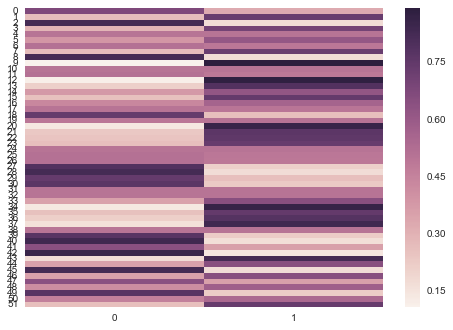

In [24]:
import seaborn as sns

doc_topics = [lda.get_document_topics(doc) for doc in corpus]

doc_topic_probabilities = []

for document in doc_topics:
    
    single_document = []
    
    for topic, probablity in document:
        
        single_document.append(probablity)
        
    doc_topic_probabilities.append(single_document)
    
docs_topics = pd.DataFrame(doc_topic_probabilities)
sns.heatmap(docs_topics)

## FURTHER STUDIES NEXT: 